In [1]:
!python -m unittest discover -s tests

2023-10-04 16:29:03.383872: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-04 16:29:03.522592: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-04 16:29:03.522617: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-10-04 16:29:04.496470: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 670/670 [03:20<00:00,  3.35it/s]


Resizing test images


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 65/65 [00:01<00:00, 63.94it/s]


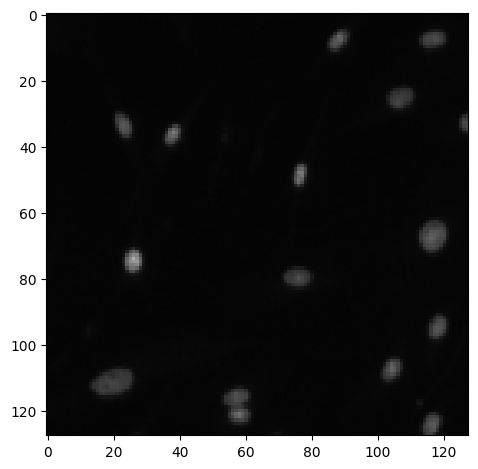

In [1]:
from src.canvas import Canvas
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

canvas = Canvas()
canvas.resize_images_and_masks()
canvas.predict_x()
image_idx = 5
imshow(canvas.x_train[image_idx])
plt.show()

In [4]:
from src.unet import UNet
import tensorflow as tf
# Example usage
unet = UNet()
unet.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
unet.summary()
checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_nuclei.h5', verbose=1, save_best_only=True)

callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]

results = unet.model.fit(canvas.x_train, canvas.y_train, validation_split=0.1, batch_size=16, epochs=25, callbacks=callbacks)

2023-10-04 17:08:40.082823: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-04 17:08:40.083143: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-04 17:08:40.083191: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-10-04 17:08:40.083231: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-10-04 17:08:40.083268: W tensorflow/c

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda (Lambda)                (None, 128, 128, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 16  448         ['lambda[0][0]']                 
                                )                                                                 
                                                                                              

KeyboardInterrupt: 

3/3 [==============================] - 2s 490ms/step


/home/xenos/Documents/world-generator-service/world-generator-service/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


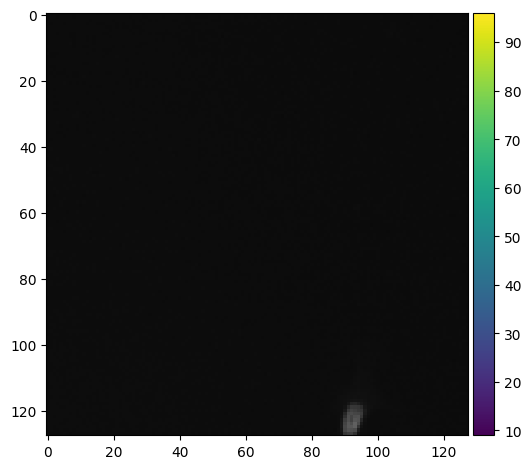

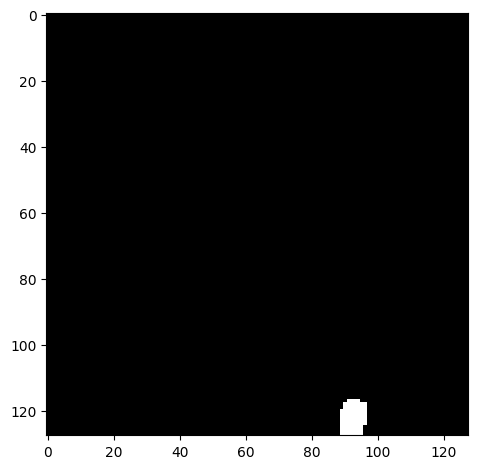

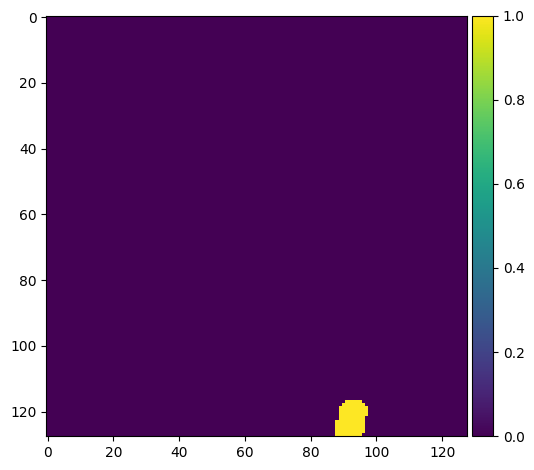

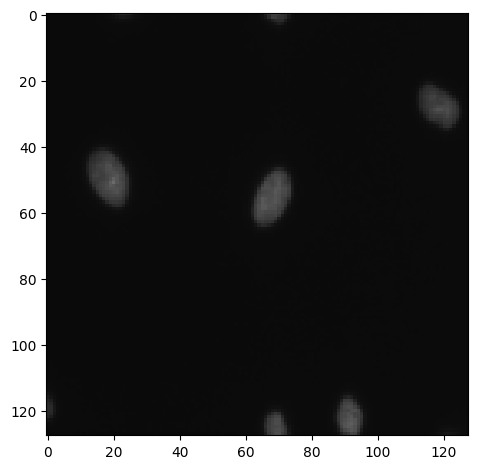

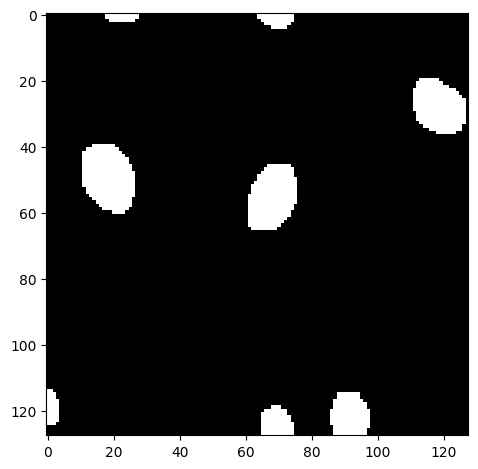

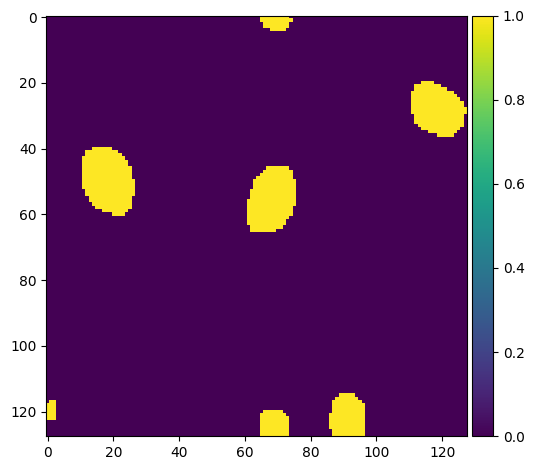

In [7]:
import random
import numpy as np
idx = random.randint(0, len(canvas.x_train))


preds_train = unet.model.predict(canvas.x_train[:int(canvas.x_train.shape[0]*0.9)], verbose=1)
preds_val = unet.model.predict(canvas.x_train[int(canvas.x_train.shape[0]*0.9):], verbose=1)
preds_test = unet.model.predict(canvas.x_predicts, verbose=1)

 
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)
preds_test_t = (preds_test > 0.5).astype(np.uint8)


# Perform a sanity check on some random training samples
ix = random.randint(0, len(preds_train_t))
imshow(canvas.x_train[ix])
plt.show()
imshow(np.squeeze(canvas.y_train[ix]))
plt.show()
imshow(np.squeeze(preds_train_t[ix]))
plt.show()

# Perform a sanity check on some random validation samples
ix = random.randint(0, len(preds_val_t))
imshow(canvas.x_train[int(canvas.x_train.shape[0]*0.9):][ix])
plt.show()
imshow(np.squeeze(canvas.y_train[int(canvas.y_train.shape[0]*0.9):][ix]))
plt.show()
imshow(np.squeeze(preds_val_t[ix]))
plt.show()
